In [60]:
import glob
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from skimage import color
from skimage import io
import PIL
import pandas as pd
import random
import cv2
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [61]:
images=glob.glob('/Users/Assignment/Cropped/*/*')


In [62]:
hist=[]
classes=[]
for i in images:
    image = plt.imread(i)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (n,bins)=np.histogram(gray_image,256,[0,256])
    hist.append(n)
    classes.append(str(i).split('/')[4].split('-')[1])

    
    

In [63]:
len(hist)

786

In [64]:
len(hist[0])

256

In [65]:
hist_1=pd.DataFrame(hist)

In [66]:
data=pd.DataFrame(preprocessing.StandardScaler().fit_transform(hist_1),columns=hist_1.columns,index=classes)

In [67]:
data

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
Pembroke,-0.235813,-0.417707,-0.322683,-0.254150,-0.363709,-0.200094,-0.176900,-0.186681,-0.108286,0.584708,...,-0.179002,-0.264205,-0.219945,-0.167452,-0.049898,0.047883,0.003316,0.317727,-0.140152,-0.137335
Pembroke,-0.151907,-0.142557,-0.027141,-0.070834,-0.141519,-0.145016,-0.064360,-0.105704,-0.055338,-0.327727,...,0.412157,0.580366,0.286036,0.550153,0.324414,0.189637,-0.074016,-0.161554,-0.104182,0.024608
Pembroke,-0.207844,-0.184887,-0.161478,-0.070834,-0.252614,-0.034861,-0.036225,0.218207,0.156450,0.506499,...,0.362893,0.381644,0.159541,0.761213,0.449185,0.579462,0.103846,0.712430,0.435375,0.034730
Pembroke,-0.235813,-0.396541,-0.430153,-0.437466,-0.502578,-0.530559,-0.542656,-0.591569,-0.611283,-0.640562,...,-0.622371,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456
Pembroke,-0.207844,-0.375376,-0.376418,-0.411278,-0.280388,-0.420404,-0.486386,-0.348636,-0.425968,-0.353797,...,-0.425318,-0.363567,-0.430771,-0.294088,-0.174668,-0.129310,-0.058549,-0.415291,-0.266049,-0.147456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dandie_Dinmont,-0.179875,-0.269549,-0.322683,-0.306526,-0.280388,-0.200094,-0.092495,-0.267659,-0.108286,0.141525,...,-0.622371,-0.462928,-0.515101,-0.462936,-0.465800,-0.483696,-0.128148,-0.415291,-0.391945,-0.147456
Dandie_Dinmont,-0.123938,-0.311880,-0.322683,-0.385090,-0.335935,-0.447942,-0.458251,-0.375629,-0.531863,-0.432005,...,1.594474,1.822384,2.099136,1.774302,2.029614,1.429988,0.413171,1.417255,1.190754,0.135944
Dandie_Dinmont,-0.179875,-0.015564,-0.268948,-0.201774,-0.280388,-0.392865,-0.373845,-0.429614,-0.505389,-0.353797,...,-0.031213,-0.512609,-0.135615,-0.294088,-0.424210,-0.377380,-0.135881,-0.358905,-0.337989,-0.117092
Dandie_Dinmont,-0.123938,0.217255,-0.188346,-0.175586,-0.197066,-0.227632,-0.401981,-0.051719,-0.081812,-0.119170,...,-0.573108,-0.512609,-0.430771,-0.378512,-0.465800,-0.483696,-0.104948,-0.415291,-0.409930,-0.147456


In [68]:
data['class']=data.index

In [69]:
data.index=[i for i in range(786)]

In [70]:
data

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,class
0,-0.235813,-0.417707,-0.322683,-0.254150,-0.363709,-0.200094,-0.176900,-0.186681,-0.108286,0.584708,...,-0.264205,-0.219945,-0.167452,-0.049898,0.047883,0.003316,0.317727,-0.140152,-0.137335,Pembroke
1,-0.151907,-0.142557,-0.027141,-0.070834,-0.141519,-0.145016,-0.064360,-0.105704,-0.055338,-0.327727,...,0.580366,0.286036,0.550153,0.324414,0.189637,-0.074016,-0.161554,-0.104182,0.024608,Pembroke
2,-0.207844,-0.184887,-0.161478,-0.070834,-0.252614,-0.034861,-0.036225,0.218207,0.156450,0.506499,...,0.381644,0.159541,0.761213,0.449185,0.579462,0.103846,0.712430,0.435375,0.034730,Pembroke
3,-0.235813,-0.396541,-0.430153,-0.437466,-0.502578,-0.530559,-0.542656,-0.591569,-0.611283,-0.640562,...,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456,Pembroke
4,-0.207844,-0.375376,-0.376418,-0.411278,-0.280388,-0.420404,-0.486386,-0.348636,-0.425968,-0.353797,...,-0.363567,-0.430771,-0.294088,-0.174668,-0.129310,-0.058549,-0.415291,-0.266049,-0.147456,Pembroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,-0.179875,-0.269549,-0.322683,-0.306526,-0.280388,-0.200094,-0.092495,-0.267659,-0.108286,0.141525,...,-0.462928,-0.515101,-0.462936,-0.465800,-0.483696,-0.128148,-0.415291,-0.391945,-0.147456,Dandie_Dinmont
782,-0.123938,-0.311880,-0.322683,-0.385090,-0.335935,-0.447942,-0.458251,-0.375629,-0.531863,-0.432005,...,1.822384,2.099136,1.774302,2.029614,1.429988,0.413171,1.417255,1.190754,0.135944,Dandie_Dinmont
783,-0.179875,-0.015564,-0.268948,-0.201774,-0.280388,-0.392865,-0.373845,-0.429614,-0.505389,-0.353797,...,-0.512609,-0.135615,-0.294088,-0.424210,-0.377380,-0.135881,-0.358905,-0.337989,-0.117092,Dandie_Dinmont
784,-0.123938,0.217255,-0.188346,-0.175586,-0.197066,-0.227632,-0.401981,-0.051719,-0.081812,-0.119170,...,-0.512609,-0.430771,-0.378512,-0.465800,-0.483696,-0.104948,-0.415291,-0.409930,-0.147456,Dandie_Dinmont


In [71]:
training_data=pd.DataFrame()
testing_data=pd.DataFrame()
for i in data['class'].unique():
    print(i)
    data1=data[data['class']==str(i)]
    training_dat = data1.sample(frac=0.8,random_state=42)
    testing_dat = data1.drop(training_dat.index)
    training_data=pd.concat([training_data,training_dat])
    testing_data=pd.concat([testing_data,testing_dat])

Pembroke
bluetick
papillon
Dandie_Dinmont


In [72]:
len(training_data)

628

In [73]:
len(testing_data)

158

In [74]:
training_data[training_data['class']=='Pembroke'].shape

(159, 257)

In [75]:
for i in data['class'].unique():
    print(len(training_data[training_data['class']==str(i)].index))
    print(len(testing_data[testing_data['class']==str(i)].index))
    

159
40
138
35
168
42
163
41


In [76]:
training_data.index=training_data['class']
testing_data.index=testing_data['class']

In [77]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,class
class,,,,,,,,,,,,,,,,,,,,,
Pembroke,-0.235813,-0.396541,-0.430153,-0.437466,-0.419256,-0.392865,-0.570791,-0.564577,-0.611283,-0.562353,...,-0.313886,-0.388606,-0.505148,-0.424210,-0.377380,-0.135881,-0.217940,-0.248063,-0.117092,Pembroke
Pembroke,-0.235813,-0.417707,-0.376418,-0.437466,-0.447030,-0.530559,-0.542656,-0.537584,-0.584810,-0.614492,...,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456,Pembroke
Pembroke,-0.235813,-0.417707,-0.430153,-0.411278,-0.474804,-0.503020,-0.514521,-0.564577,-0.584810,-0.614492,...,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456,Pembroke
Pembroke,-0.235813,-0.396541,-0.403285,-0.437466,-0.474804,-0.503020,-0.542656,-0.564577,-0.584810,-0.614492,...,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456,Pembroke
Pembroke,-0.235813,-0.269549,-0.188346,-0.018458,0.108445,-0.089939,-0.036225,0.137229,0.129976,0.115456,...,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.391945,-0.147456,Pembroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dandie_Dinmont,-0.151907,-0.206053,-0.054008,-0.149398,0.025124,0.075294,0.245126,-0.105704,-0.134759,-0.327727,...,6.790452,5.388016,7.008594,6.978851,6.072443,1.395279,6.040909,3.223084,1.006389,Dandie_Dinmont
Dandie_Dinmont,-0.179875,-0.290714,0.053461,-0.097022,-0.280388,-0.337787,-0.233170,-0.456606,-0.373021,-0.301657,...,0.729409,0.412532,1.014485,0.989858,0.614900,0.134779,0.317727,0.327464,0.054973,Dandie_Dinmont
Dandie_Dinmont,-0.235813,-0.417707,-0.430153,-0.437466,-0.502578,-0.530559,-0.570791,-0.591569,-0.611283,-0.640562,...,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456,Dandie_Dinmont


In [78]:
target_train=training_data.index
training_data=training_data.drop(columns=['class'])

In [79]:
target_train

Index(['Pembroke', 'Pembroke', 'Pembroke', 'Pembroke', 'Pembroke', 'Pembroke',
       'Pembroke', 'Pembroke', 'Pembroke', 'Pembroke',
       ...
       'Dandie_Dinmont', 'Dandie_Dinmont', 'Dandie_Dinmont', 'Dandie_Dinmont',
       'Dandie_Dinmont', 'Dandie_Dinmont', 'Dandie_Dinmont', 'Dandie_Dinmont',
       'Dandie_Dinmont', 'Dandie_Dinmont'],
      dtype='object', name='class', length=628)

In [80]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
class,,,,,,,,,,,,,,,,,,,,,
Pembroke,-0.235813,-0.396541,-0.430153,-0.437466,-0.419256,-0.392865,-0.570791,-0.564577,-0.611283,-0.562353,...,-0.474582,-0.313886,-0.388606,-0.505148,-0.424210,-0.377380,-0.135881,-0.217940,-0.248063,-0.117092
Pembroke,-0.235813,-0.417707,-0.376418,-0.437466,-0.447030,-0.530559,-0.542656,-0.537584,-0.584810,-0.614492,...,-0.622371,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456
Pembroke,-0.235813,-0.417707,-0.430153,-0.411278,-0.474804,-0.503020,-0.514521,-0.564577,-0.584810,-0.614492,...,-0.622371,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456
Pembroke,-0.235813,-0.396541,-0.403285,-0.437466,-0.474804,-0.503020,-0.542656,-0.564577,-0.584810,-0.614492,...,-0.622371,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456
Pembroke,-0.235813,-0.269549,-0.188346,-0.018458,0.108445,-0.089939,-0.036225,0.137229,0.129976,0.115456,...,-0.622371,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.391945,-0.147456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dandie_Dinmont,-0.151907,-0.206053,-0.054008,-0.149398,0.025124,0.075294,0.245126,-0.105704,-0.134759,-0.327727,...,5.831112,6.790452,5.388016,7.008594,6.978851,6.072443,1.395279,6.040909,3.223084,1.006389
Dandie_Dinmont,-0.179875,-0.290714,0.053461,-0.097022,-0.280388,-0.337787,-0.233170,-0.456606,-0.373021,-0.301657,...,0.904789,0.729409,0.412532,1.014485,0.989858,0.614900,0.134779,0.317727,0.327464,0.054973
Dandie_Dinmont,-0.235813,-0.417707,-0.430153,-0.437466,-0.502578,-0.530559,-0.570791,-0.591569,-0.611283,-0.640562,...,-0.622371,-0.611970,-0.557266,-0.547360,-0.548980,-0.519135,-0.143614,-0.443484,-0.409930,-0.147456


In [81]:
for i in [1,3,5,7,10,20]:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(training_data,target_train)
    scores = cross_val_score(neigh, training_data,target_train,cv=5)
    print(scores)
    print(np.mean(scores))
    

[0.35714286 0.41269841 0.35714286 0.392      0.336     ]
0.3709968253968254
[0.37301587 0.34126984 0.38095238 0.32       0.376     ]
0.3582476190476191
[0.37301587 0.30952381 0.36507937 0.328      0.344     ]
0.3439238095238095
[0.38095238 0.36507937 0.33333333 0.32       0.36      ]
0.35187301587301584
[0.41269841 0.33333333 0.33333333 0.296      0.304     ]
0.3358730158730159
[0.36507937 0.34920635 0.3968254  0.368      0.336     ]
0.36302222222222225


In [82]:
from sklearn.model_selection import KFold
skf =KFold(n_splits=5)
mean_train,mean_val=[],[]
for i in [1,3,5,7,10,20]:
    knn = KNeighborsClassifier(n_neighbors=i)
    train_errors=[]
    val_errors=[]
    for train_index, val_index in skf.split(training_data, target_train):
        X_train, X_val = training_data.iloc[train_index], training_data.iloc[val_index]
        y_train, y_val = target_train[train_index], target_train[val_index]
        knn.fit(X_train, y_train)
        train_errors.append(100 - knn.score(X_train, y_train)*100)
        val_errors.append(100 - knn.score(X_val, y_val)*100)
    mean_train_error = np.mean(train_errors)
    print(mean_train_error)
    mean_val_error = np.mean(val_errors)
    mean_train.append(mean_train_error)
    mean_val.append(mean_val_error)

0.0
36.22678272991533
43.39184019389638
46.09815212311787
50.11825461573191
52.74646939082636


In [83]:
from sklearn.model_selection import StratifiedKFold
skf =StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
mean_train_st,mean_val_st=[],[]
for i in [1,3,5,7,10,20]:
    knn = KNeighborsClassifier(n_neighbors=i)
    train_errors=[]
    val_errors=[]
    for train_index, val_index in skf.split(training_data, target_train):
        X_train, X_val = training_data.iloc[train_index], training_data.iloc[val_index]
        y_train, y_val = target_train[train_index], target_train[val_index]
        knn.fit(X_train, y_train)
        train_errors.append(100 -  knn.score(X_train,y_train)*100)
        val_errors.append(100 -  knn.score(X_val,y_val)*100)
        mean_train_error = np.mean(train_errors)
        mean_val_error = np.mean(val_errors)
    mean_train_st.append(mean_train_error)
    mean_val_st.append(mean_val_error)


In [84]:
mean_train_st, mean_val_st,mean_train,mean_val

([0.0,
  38.614924001805896,
  46.21902053812583,
  48.528272595502685,
  53.463759277007284,
  57.04632761201714],
 [65.1263492063492,
  67.35238095238097,
  64.80126984126983,
  62.25015873015874,
  64.16761904761904,
  64.65650793650794],
 [0.0,
  36.22678272991533,
  43.39184019389638,
  46.09815212311787,
  50.11825461573191,
  52.74646939082636],
 [81.68,
  82.93841269841269,
  85.4920634920635,
  87.24825396825398,
  90.9104761904762,
  92.18539682539681])

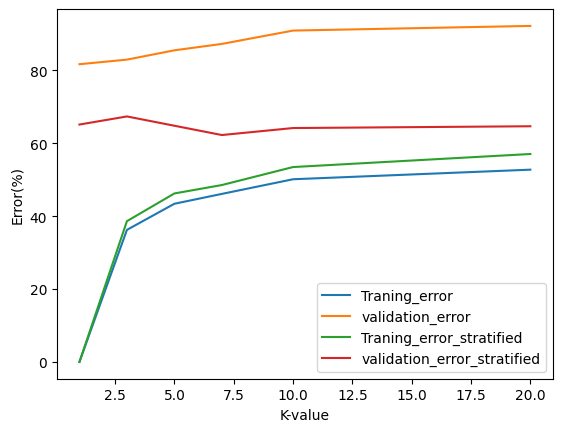

In [85]:
plt.plot([1,3,5,7,10,20],mean_train,label='Traning_error')
plt.plot([1,3,5,7,10,20],mean_val,label='validation_error')
plt.plot([1,3,5,7,10,20],mean_train_st,label='Traning_error_stratified')
plt.plot([1,3,5,7,10,20],mean_val_st,label='validation_error_stratified')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Error(%)')
plt.show()

### Which 𝑘 has the lowest mean error for each curve? standard Traning_error ->k=1;standard validation_error->k=1; Traning_error_stratified k=1; validation_error_stratified k=7

when K value increase, the model gets simpler and which may cause overfitting and when k-value is low, the model becomes complex and sometimes cause overfitting as it catches noise data as well. 

At k=1, the validation error is high and training error is low beacuse of overfitting and for standard cross-validation, the validation error and training error are high because of underfitting

At k=7, stratified validation error is low

In [111]:
from sklearn.metrics import accuracy_score
target_test=testing_data.index
testing=testing_data.drop(columns=['class'])
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(training_data, target_train)
test_error = 1 - knn.score(testing,target_test)
print(f'testerror-{test_error}')

testerror-0.5949367088607596


# MLP

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
def metric(classifier,testing,target_test):
    ConfusionMatrixDisplay.from_estimator(classifier, testing, target_test) 
    y_pred=classifier.predict(testing)
    accuracy=accuracy_score(target_test,y_pred)
    f1=f1_score(target_test ,y_pred,average='weighted')
    return f1,accuracy

/Users/chinmai/miniforge3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chinmai/miniforge3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chinmai/miniforge3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chinmai/miniforge3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/chinmai/miniforge

Mean Accuracy: 0.37286349206349206
Accuracy :0.31645569620253167 and f1 score: 0.31643355072277707


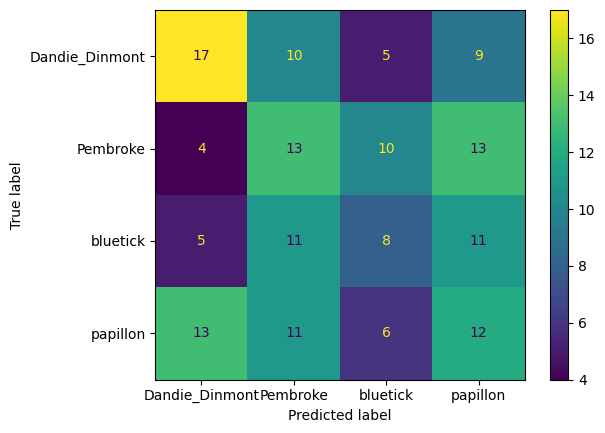

In [106]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,accuracy_score
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
stratified_kfold = StratifiedKFold(n_splits=5)
mlp_classifier.fit(training_data,target_train)
cross_val_scores = cross_val_score(mlp_classifier, training_data, target_train, cv=stratified_kfold, scoring='accuracy')
print("Mean Accuracy:", np.mean(cross_val_scores))
f1,accuracy=metric(mlp_classifier,testing,target_test)
print(f'Accuracy :{accuracy} and f1 score: {f1}')



In [98]:
# naive_bayes

Mean Accuracy: 0.37746031746031744
Accuracy :0.3037974683544304 and f1 score: 0.2977374040072023


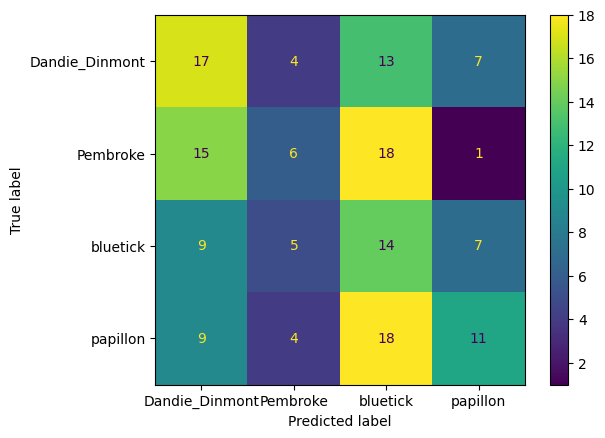

In [108]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(training_data,target_train)
cross_val_scores = cross_val_score(gnb, training_data, target_train, cv=stratified_kfold, scoring='accuracy')
print("Mean Accuracy:", np.mean(cross_val_scores))
f1,accuracy=metric(gnb,testing,target_test)
print(f'Accuracy :{accuracy} and f1 score: {f1}')

In [100]:
# RandomForestClassifier

Mean Accuracy: 0.4316063492063492
Accuracy :0.4050632911392405 and f1 score: 0.4010689401731922


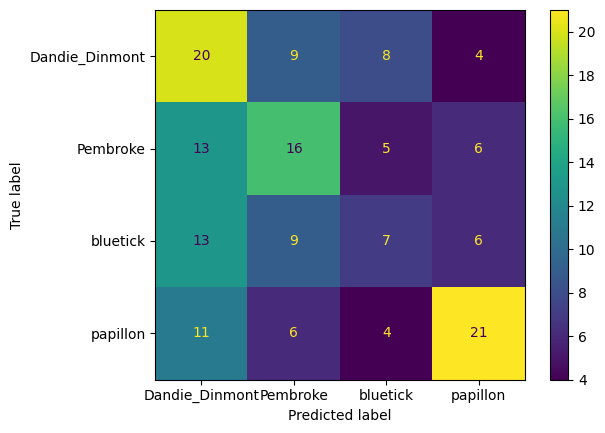

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(training_data,target_train)
cross_val_scores = cross_val_score(rf_classifier, training_data, target_train, cv=stratified_kfold, scoring='accuracy')
print("Mean Accuracy:", np.mean(cross_val_scores))
f1,accuracy=metric(rf_classifier,testing,target_test)
print(f'Accuracy :{accuracy} and f1 score: {f1}')

In [102]:
# Based on True Positives,TN, FN and FP, RandomForestClassifier performs better than other two as Accuracy, F1score, precision is high
# RandomForestClassifier performs better than other two based on Mean validation Accuracy
# RandomForestClassifier performs better than other two based on  Accuracy
# RandomForestClassifier performs better than other two based on  F1 score

## References:
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
### https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
### https://www.kaggle.com/code/kartik2khandelwal/stratified-kfold-with-knn-improved-score
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
### https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/
### https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e